<a href="https://colab.research.google.com/github/engineereliab076/my-projects/blob/main/nlp%20..poetry%20generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

--2024-01-30 05:39:16--  https://storage.googleapis.com/learning-datasets/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.218.207, 142.251.31.207, 142.251.18.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.218.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0.09s   

2024-01-30 05:39:17 (758 KB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [3]:
tokenizer = Tokenizer()

data = open('/tmp/irish-lyrics-eof.txt').read()
corpus = data.lower().split('\n')

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index)+1

In [4]:
data

'Come all ye maidens young and fair\nAnd you that are blooming in your prime\nAlways beware and keep your garden fair\nLet no man steal away your thyme\nFor thyme it is a precious thing\nAnd thyme brings all things to my mind\nnlyme with all its flavours, along with all its joys\nThyme, brings all things to my mind\nOnce I and a bunch of thyme\ni thought it never would decay\nThen came a lusty sailor\nWho chanced to pass my way\nAnd stole my bunch of thyme away\nThe sailor gave to me a rose\nA rose that never would decay\nHe gave it to me to keep me reminded\nOf when he stole my thyme away\nSleep, my child, and peace attend thee\nAll through the night\nGuardian angels God will send thee\nSoft the drowsy hours are creeping\nHill and dale in slumber sleeping\nI my loving vigil keeping\nWhile the moon her watch is keeping\nWhile the weary world is sleeping\nOer thy spirit gently stealing\nVisions of delight revealing\nBreathes a pure and holy feeling\nThough I roam a minstrel lonely\nMy t

In [5]:
total_words

2690

In [6]:
#SEQUENCING

input_sequences = []

for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1,len(token_list)):
    n_gram_sequence=token_list[:i+1]
    input_sequences.append(n_gram_sequence)

In [7]:
input_sequences

[[51, 12],
 [51, 12, 96],
 [51, 12, 96, 1217],
 [51, 12, 96, 1217, 48],
 [51, 12, 96, 1217, 48, 2],
 [51, 12, 96, 1217, 48, 2, 69],
 [2, 11],
 [2, 11, 15],
 [2, 11, 15, 31],
 [2, 11, 15, 31, 361],
 [2, 11, 15, 31, 361, 8],
 [2, 11, 15, 31, 361, 8, 24],
 [2, 11, 15, 31, 361, 8, 24, 1218],
 [272, 798],
 [272, 798, 2],
 [272, 798, 2, 204],
 [272, 798, 2, 204, 24],
 [272, 798, 2, 204, 24, 579],
 [272, 798, 2, 204, 24, 579, 69],
 [118, 35],
 [118, 35, 119],
 [118, 35, 119, 799],
 [118, 35, 119, 799, 56],
 [118, 35, 119, 799, 56, 24],
 [118, 35, 119, 799, 56, 24, 184],
 [10, 184],
 [10, 184, 25],
 [10, 184, 25, 23],
 [10, 184, 25, 23, 5],
 [10, 184, 25, 23, 5, 580],
 [10, 184, 25, 23, 5, 580, 456],
 [2, 184],
 [2, 184, 800],
 [2, 184, 800, 12],
 [2, 184, 800, 12, 801],
 [2, 184, 800, 12, 801, 4],
 [2, 184, 800, 12, 801, 4, 7],
 [2, 184, 800, 12, 801, 4, 7, 235],
 [1219, 17],
 [1219, 17, 12],
 [1219, 17, 12, 75],
 [1219, 17, 12, 75, 1220],
 [1219, 17, 12, 75, 1220, 236],
 [1219, 17, 12, 75, 1

In [8]:
#padding

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(
    input_sequences,maxlen=max_sequence_len,padding='pre'
))

In [9]:
print(input_sequences)

[[   0    0    0 ...    0   51   12]
 [   0    0    0 ...   51   12   96]
 [   0    0    0 ...   12   96 1217]
 ...
 [   0    0    0 ...    0   47  105]
 [   0    0    0 ...   47  105  138]
 [   0    0    0 ...  105  138  184]]


train test split

In [10]:
x = input_sequences[:,:-1]
y = input_sequences[:,-1]

In [11]:
#make our y to be categorical and 1 hot encoding

y = tf.keras.utils.to_categorical(y, num_classes=total_words)

model training

In [12]:
model = Sequential()
model.add(Embedding(total_words,240,input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words,activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

history = model.fit(x,y,epochs=50,verbose=1)

Epoch 1/50
377/377 [==============================] - 17s 33ms/step - loss: 6.6388 - accuracy: 0.0742
Epoch 2/50
377/377 [==============================] - 4s 11ms/step - loss: 5.6848 - accuracy: 0.1236
Epoch 3/50
377/377 [==============================] - 3s 9ms/step - loss: 4.7992 - accuracy: 0.1666
Epoch 4/50
377/377 [==============================] - 3s 7ms/step - loss: 3.9985 - accuracy: 0.2306
Epoch 5/50
377/377 [==============================] - 3s 9ms/step - loss: 4.0510 - accuracy: 0.2539
Epoch 6/50
377/377 [==============================] - 3s 8ms/step - loss: 3.3987 - accuracy: 0.3126
Epoch 7/50
377/377 [==============================] - 3s 8ms/step - loss: 2.7212 - accuracy: 0.3987
Epoch 8/50
377/377 [==============================] - 3s 7ms/step - loss: 2.3236 - accuracy: 0.4638
Epoch 9/50
377/377 [==============================] - 3s 8ms/step - loss: 2.0749 - accuracy: 0.5088
Epoch 10/50
377/377 [==============================] - 3s 9ms/step - loss: 1.8244 - accuracy: 0.5

In [13]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

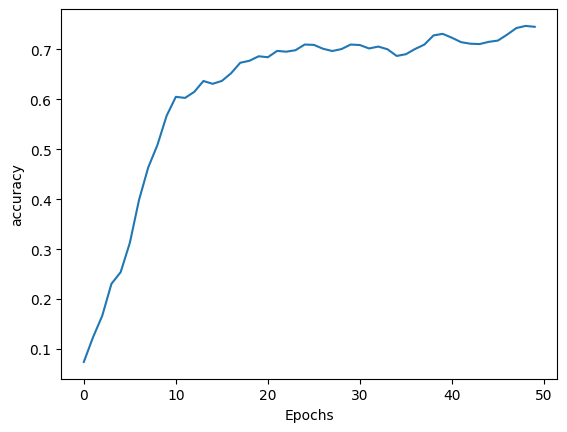

In [14]:
plot_graphs(history, 'accuracy')

In [29]:
#generating text

seed_text = "today i thought about killing you"
next_words = 100

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 18ms/step
today i thought about killing you went into battle i took me by the moons shining brightly far with rust my plow turns brown times i love eye but sure i might water wrath was born gallant engaging i might de dow corporal casey hair out across the sky above i havent an arm ye havent a leg we beer flower with much i suppose irishmen too i suppose gone to the covers buttoned down we glass colonel farrell i sweet one this writin a part brand new land far away cross oer the sea and blue love and did look fresh as your oer by
